# Librerías

In [ ]:
from datetime   import datetime
import pandas   as pd
import numpy    as np
import warnings
import scipy.stats as stats
import math

#Para gráficos y mapas de calor
import seaborn            as sb
import matplotlib.pyplot  as plt
import plotly.graph_objs  as go

#Para la imputación de los datos
from sklearn.impute     import SimpleImputer
from sklearn.compose    import ColumnTransformer
import missingno        as msno

#Para el pre-procesamiento de los datos
from sklearn.preprocessing      import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.feature_selection  import SelectKBest, chi2


#Para generar los modelos
from sklearn.model_selection    import train_test_split
from sklearn.metrics            import mean_squared_error, r2_score
import statsmodels.api          as sm
import statsmodels.formula.api  as smf


# Suprimir los warnings específicos
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Lectura


In [ ]:
saber11_df = pd.read_parquet("saber11_limpio.parquet")
saber11_df.shape[0]

7109704

Para poder identificar el tipo de dato de las columnas y si tienen alguna novedad que debamos tener en cuenta para tratar los datos correctamente  utilizaremos el comando ".info()" para ver el tipo de dato de cada campo .

- Encontramos que todos los datos cargados del dataframe son de tipo "object" 
- Por lo que mas adelante se tendra que modificar el tipo de dato en algunos campos para poder tratarlos correctamente

In [3]:
saber11_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109704 entries, 0 to 7109703
Data columns (total 51 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   periodo                        object
 1   estu_tipodocumento             object
 2   estu_consecutivo               object
 3   cole_area_ubicacion            object
 4   cole_bilingue                  object
 5   cole_calendario                object
 6   cole_caracter                  object
 7   cole_cod_dane_establecimiento  object
 8   cole_cod_dane_sede             object
 9   cole_cod_depto_ubicacion       object
 10  cole_cod_mcpio_ubicacion       object
 11  cole_codigo_icfes              object
 12  cole_depto_ubicacion           object
 13  cole_genero                    object
 14  cole_jornada                   object
 15  cole_mcpio_ubicacion           object
 16  cole_naturaleza                object
 17  cole_nombre_establecimiento    object
 18  cole_nombre_sede      

El dataset cuenta con 51 columnas, que abarcan:

Identificación y datos personales del estudiante: tipo de documento, género, fecha de nacimiento, departamento y municipio de residencia.
Información del establecimiento educativo: nombre, código DANE, ubicación geográfica, calendario, carácter, jornada y naturaleza del colegio.

Contexto familiar: nivel educativo de los padres, número de personas en el hogar y acceso a bienes como computador, internet o lavadora.

Resultados académicos: puntajes por área (lectura crítica, matemáticas, ciencias naturales, sociales e inglés) y el puntaje global.

In [4]:
saber11_df.head(4)

,periodo,estu_tipodocumento,estu_consecutivo,cole_area_ubicacion,cole_bilingue,cole_calendario,cole_caracter,cole_cod_dane_establecimiento,cole_cod_dane_sede,cole_cod_depto_ubicacion,cole_cod_mcpio_ubicacion,cole_codigo_icfes,cole_depto_ubicacion,cole_genero,cole_jornada,cole_mcpio_ubicacion,cole_naturaleza,cole_nombre_establecimiento,cole_nombre_sede,cole_sede_principal,estu_cod_depto_presentacion,estu_cod_mcpio_presentacion,estu_cod_reside_depto,estu_cod_reside_mcpio,estu_depto_presentacion,estu_depto_reside,estu_estadoinvestigacion,estu_estudiante,estu_fechanacimiento,estu_genero,estu_mcpio_presentacion,estu_mcpio_reside,estu_nacionalidad,estu_pais_reside,estu_privado_libertad,fami_cuartoshogar,fami_educacionmadre,fami_educacionpadre,fami_estratovivienda,fami_personashogar,fami_tieneautomovil,fami_tienecomputador,fami_tieneinternet,fami_tienelavadora,desemp_ingles,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
0,20131,CR,SB11201310000414,URBANO,N,B,ACADÉMICO,311848000812,311848000812,11,11001,022574,BOGOTA,FEMENINO,COMPLETA,BOGOTÁ D.C.,NO OFICIAL,GIMN FEMENINO,GIMN FEMENINO,S,11,11001,11,11001,BOGOTÁ,BOGOTÁ,PUBLICAR,ESTUDIANTE,08/08/1994,F,BOGOTÁ D.C.,BOGOTÁ D.C.,COLOMBIA,COLOMBIA,N,Cuatro,Educación profesional completa,Educación profesional completa,Estrato 6,Cuatro,Si,Si,Si,Si,B+,94,88,None,None,None,None
1,20194,TI,SB11201940464873,RURAL,N,A,TÉCNICO/ACADÉMICO,141016000305,241016000342,41,41016,194878,HUILA,MIXTO,COMPLETA,AIPE,OFICIAL,INSTITUCION EDUCATIVA JESUS MARIA AGUIRRE CHARRY,DINDAL,N,41,41016,41,41016,HUILA,HUILA,PUBLICAR,ESTUDIANTE,15/02/2003,F,AIPE,AIPE,COLOMBIA,COLOMBIA,N,Dos,Postgrado,Primaria completa,Estrato 2,1 a 2,No,Si,Si,Si,B1,71,66,70,65,69,339
2,20194,TI,SB11201940464873,RURAL,N,A,TÉCNICO/ACADÉMICO,141016000305,241016000342,41,41016,194878,HUILA,MIXTO,COMPLETA,AIPE,OFICIAL,INSTITUCION EDUCATIVA JESUS MARIA AGUIRRE CHARRY,DINDAL,N,41,41016,41,41016,HUILA,HUILA,PUBLICAR,ESTUDIANTE,15/02/2003,F,AIPE,AIPE,COLOMBIA,COLOMBIA,N,Dos,Postgrado,Primaria completa,Estrato 2,1 a 2,No,Si,Si,Si,B1,71,66,70,65,69,339
3,20122,TI,SB11201220204399,URBANO,N,A,TÉCNICO/ACADÉMICO,163130000718,163130000718,63,63130,013029,QUINDIO,MIXTO,MAÑANA,CALARCÁ,OFICIAL,INSTITUCION EDUCATIVA ANTONIO NARIÑO,ANTONIO NARIÑO,S,63,63130,63,63130,QUINDIO,QUINDIO,PUBLICAR,ESTUDIANTE,20/05/1996,F,CALARCÁ,CALARCÁ,COLOMBIA,COLOMBIA,N,Dos,Secundaria (Bachillerato) incompleta,No sabe,Estrato 1,Cuatro,No,Si,Si,No,A1,48,45,None,None,None,None


## Modelo regresión Lineal

In [19]:

# Importar librerías

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


In [22]:

# Selección de variables predictoras y variable objetivo
X = saber11_df.drop([
    "punt_lectura_critica",
    "punt_matematicas",
    "punt_c_naturales",
    "punt_sociales_ciudadanas",
    "punt_ingles",
    "punt_global"
], axis=1)

y = saber11_df['punt_global'].astype(float)

In [23]:

# Codificar variables categóricas

X = pd.get_dummies(X, drop_first=True)

KeyboardInterrupt: 

In [ ]:
# Dividir en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("División exitosa:", X_train.shape, y_train.shape)


División exitosa: (3150126, 39) (3150126,)


In [ ]:
# Entrenar modelo

modelo_reg = LinearRegression()
modelo_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# Predicciones y evaluación

y_pred = modelo_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n Evaluación del modelo ")
print(f"MAE  (Error absoluto medio): {mae:.2f}")
print(f"RMSE (Raíz del error cuadrático medio): {rmse:.2f}")
print(f"R²   (Coeficiente de determinación): {r2:.3f}")



 Evaluación del modelo 
MAE  (Error absoluto medio): 34.85
RMSE (Raíz del error cuadrático medio): 43.28
R²   (Coeficiente de determinación): 0.263


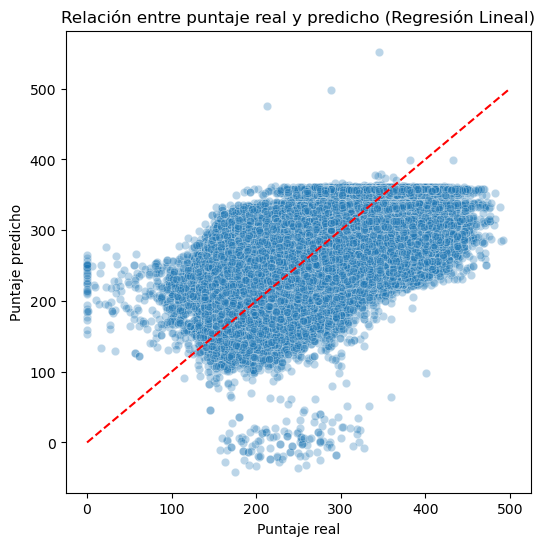

In [ ]:


# Gráfico real vs predicho

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.plot([0, 500], [0, 500], '--', color='red')
plt.xlabel("Puntaje real")
plt.ylabel("Puntaje predicho")
plt.title("Relación entre puntaje real y predicho (Regresión Lineal)")
plt.show()


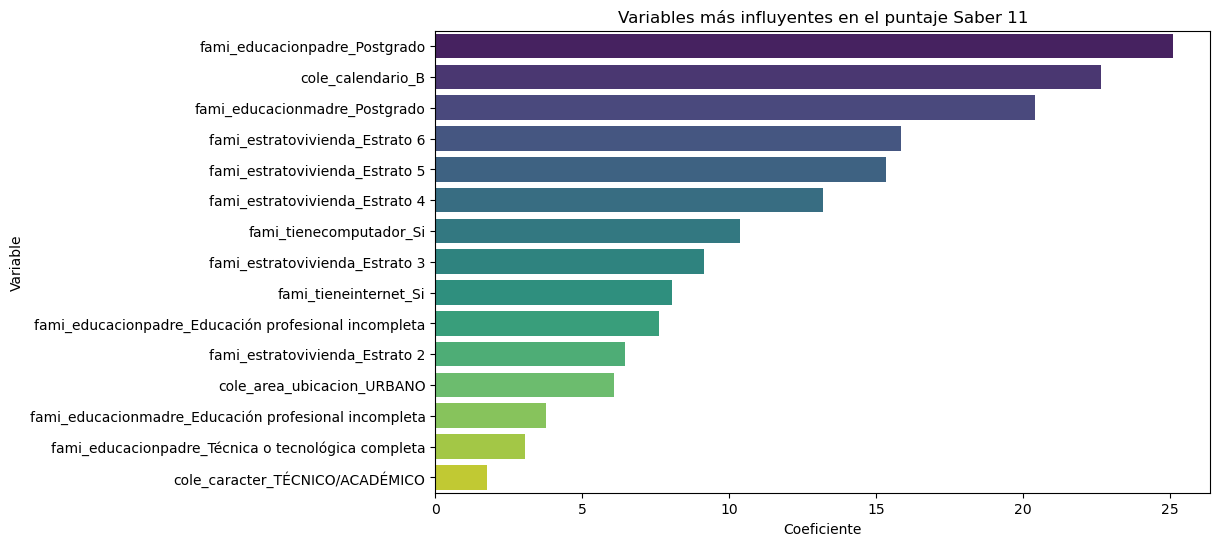

In [ ]:

# Importancia de variables

coeficientes = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': modelo_reg.coef_
}).sort_values(by='Coeficiente', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Coeficiente', y='Variable', data=coeficientes.head(15), palette='viridis')
plt.title("Variables más influyentes en el puntaje Saber 11")
plt.show()

## Conclusión del modelo de regresión lineal — Predicción del puntaje Saber 11

### Desempeño general del modelo
El modelo de **regresión lineal múltiple** obtuvo los siguientes resultados:

- **MAE (Error absoluto medio):** 34.85  
- **RMSE (Raíz del error cuadrático medio):** 43.28  
- **R² (Coeficiente de determinación):** 0.263  

Estos valores indican que el modelo logra capturar **aproximadamente el 26 % de la variabilidad** del puntaje global en las pruebas Saber 11.  
Aunque la capacidad predictiva es **moderada**, el modelo permite identificar **patrones estructurales** entre las características sociodemográficas, familiares y escolares y el rendimiento académico de los estudiantes.

El error medio de 34 a 43 puntos sugiere que el modelo puede predecir una tendencia general del puntaje, pero **no reemplaza una evaluación individual exacta**.  
Esto es esperable en datos educativos, donde intervienen factores cualitativos difíciles de medir (motivación, calidad docente, contexto institucional, etc.).

###  Interpretación del gráfico “Real vs. Predicho”
El gráfico de dispersión muestra que:
- Los puntos se agrupan alrededor de la línea roja (predicción ideal), pero con alta dispersión.  
- El modelo **subestima los puntajes altos** y **sobreestima los bajos**, lo que significa que tiende a predecir valores promedio.  
- Esto ocurre porque la regresión lineal **no capta relaciones no lineales** ni interacciones complejas entre variables.


## Random Forest Regressor

In [169]:
# Importar librerías necesarias

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [170]:
# Entrenar el modelo Random Forest

modelo_rf = RandomForestRegressor(
    n_estimators=100,      # árboles
    max_depth=10,          # profundidad
    random_state=42,
    n_jobs=-1              
)

modelo_rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [171]:
# Predicciones

y_pred_rf = modelo_rf.predict(X_test)

In [173]:
# Evaluación del modelo

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\n Evaluación del modelo Random Forest Regressor")
print(f"MAE  (Error absoluto medio): {mae_rf:.2f}")
print(f"RMSE (Raíz del error cuadrático medio): {rmse_rf:.2f}")
print(f"R²   (Coeficiente de determinación): {r2_rf:.3f}")


 Evaluación del modelo Random Forest Regressor
MAE  (Error absoluto medio): 33.82
RMSE (Raíz del error cuadrático medio): 42.05
R²   (Coeficiente de determinación): 0.304


In [174]:
# Comparación con el modelo lineal

print("\n Comparación entre modelos")
print(f"Regresión Lineal → R² = 0.263")
print(f"Random Forest    → R² = {r2_rf:.3f}")


 Comparación entre modelos
Regresión Lineal → R² = 0.263
Random Forest    → R² = 0.304


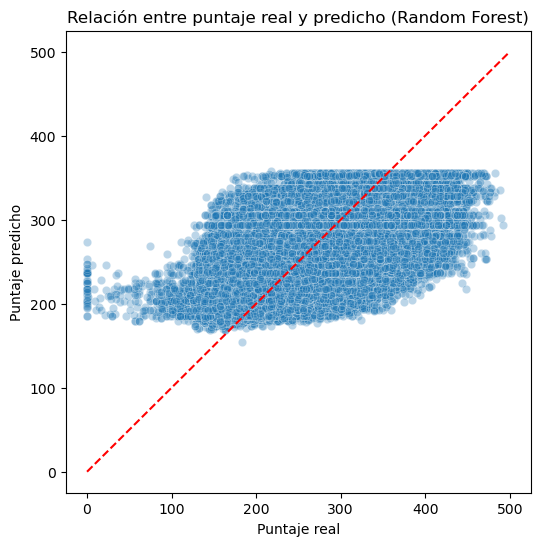

In [175]:
# Gráfico: Real vs Predicho

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.3)
plt.plot([0, 500], [0, 500], '--', color='red')
plt.xlabel("Puntaje real")
plt.ylabel("Puntaje predicho")
plt.title("Relación entre puntaje real y predicho (Random Forest)")
plt.show()


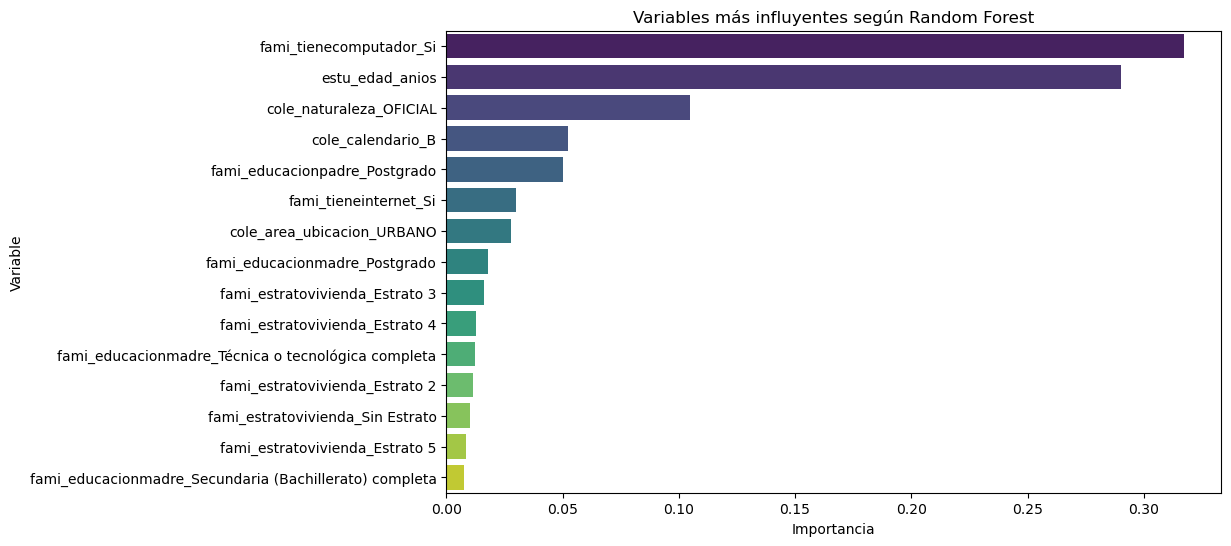

In [176]:
# Importancia de las variables

importancias = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': modelo_rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importancia', y='Variable', data=importancias.head(15), palette='viridis')
plt.title("Variables más influyentes según Random Forest")
plt.show()